In [4]:

!pip install qiskit --upgrade;
!pip install qiskit-aer;
!pip install qiskit-terra;
!pip install qiskit-machine-learning;
!pip install pylatexenc;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 28.9 MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136833 sha256=11688a4f3bc0b47cc53ab7851c90e4bb8a96a3da1de810ce3592ee708bc7a8d7
  Stored in directory: /root/.cache/pip/wheels/72/99/be/81d9bcdf5dd5ee5acd8119a9dd5bc07204c9ce205fd341b021
Successfully built pylatexenc


In [5]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, Aer
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [1]:
import qiskit
print(qiskit.__version__)

0.22.3


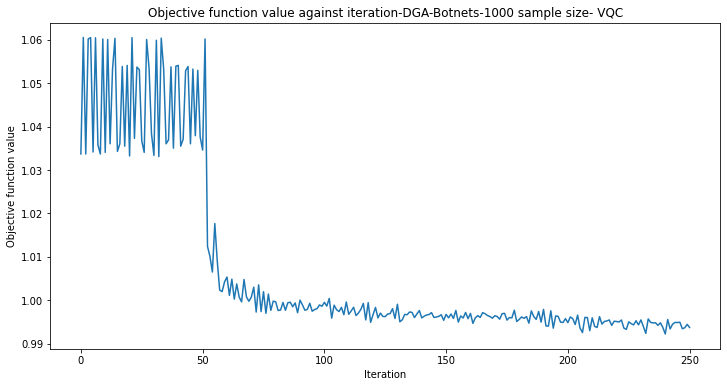

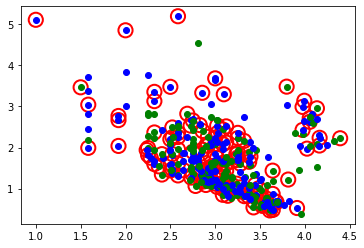

accuracy = 0.53
accuracy = 0.47333333333333333
        ┌───────────────────────────────────────────────────┐»
   q_0: ┤0                                                  ├»
        │                                                   │»
   q_1: ┤1                                                  ├»
        │                                                   │»
   q_2: ┤2                                                  ├»
        │                                                   │»
   q_3: ┤3 ZZFeatureMap(x[0],x[1],x[2],x[3],x[4],x[5],x[6]) ├»
        │                                                   │»
   q_4: ┤4                                                  ├»
        │                                                   │»
   q_5: ┤5                                                  ├»
        │                                                   │»
   q_6: ┤6                                                  ├»
        └───────────────────────────────────────────────────┘»
meas: 7/

In [49]:
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.utils import algorithm_globals
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.circuit.library import RawFeatureVector
from qiskit.algorithms.optimizers import SLSQP, SPSA
from qiskit.circuit.library import TwoLocal
from qiskit import Aer, transpile

import numpy as np
import matplotlib.pyplot as plt
import datetime
import concurrent.futures
import time
import os
import csv
import pandas as pd
from IPython.display import clear_output

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Binarizer
from sklearn.decomposition import PCA


n_features = 7
training_size = 700
test_size = 300
feature_dim = 7
num_samples = 1000
datafilename="BotnetDgaDataset_1000.csv"
resultname="result_BotnetDgaDataset_1000.txt"
cwd=os.getcwd()
mycsv=cwd+"/"+datafilename




def load_data(filepath):
    with open(filepath) as csv_file:
        data_file = csv.reader(csv_file)
        temp = next(data_file)

        data = np.empty((num_samples, n_features))
        target = np.empty((num_samples,), dtype=int)

        for i, ir in enumerate(data_file):
            data[i] = np.asarray(ir[:-1], dtype=np.float64)
            target[i] = np.asarray(ir[-1], dtype=int)

    return data, target
X, resultlabels = load_data(mycsv)




# callback function that draws a live plot when the .fit() method is called

def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration-DGA-Botnets-1000 sample size- VQC")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()


    

start = time.perf_counter()


f = open(resultname, "a")
f.write(datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S_") + "   training_size = " + str(training_size) + "  test_size = " + str(test_size) + "  feature_dim = " + str(
    feature_dim) + "\n\n")
f.flush()
f.close()



optimizer1 = SPSA()
#nFeature = get_feature_dimension(training_input) 
nFeature =7

#feature_map1 = RawFeatureVector(nFeature)
feature_map1 = ZZFeatureMap(nFeature)
ansatz = RealAmplitudes(nFeature, reps=1)


vqc = VQC(
feature_map=feature_map1,
ansatz=ansatz,
loss="cross_entropy",
optimizer=optimizer1,
callback=callback_graph,
)


# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)



sample_data,sample_resultlabels= load_data(mycsv)




y = 2 * sample_resultlabels - 1  # in {-1, +1}
y_one_hot = np.zeros((num_samples, 2))

for i in range(num_samples):
    y_one_hot[i, sample_resultlabels[i]] = 1


train_x, test_x, train_y, test_y = train_test_split(sample_data, y_one_hot, test_size=0.3)

# fit classifier to data
vqc.fit(train_x, train_y)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
vqc.score(train_x, train_y)

# evaluate data points
y_predict = vqc.predict(sample_data)

# plot results
# red == wrongly classified
for x, y_target, y_p in zip(sample_data, test_y, y_predict):
    if y_target[0] == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
    if not np.all(y_target == y_p):
        plt.scatter(x[0], x[1], s=200, facecolors="none", edgecolors="r", linewidths=2)
plt.show()
print("accuracy =", vqc.score(train_x, train_y))
print("accuracy =", vqc.score(test_x, test_y))


print(vqc.neural_network.circuit)    
finish = time.perf_counter()
print("elapsed time in seconds:",finish-start)
print(f'ALL Finished in {round( (finish-start)/3600, 2)} hour(s)')
f = open(resultname, "a")
f.write(f'ALL Finished in {round( (finish-start)/3600, 2)} hour(s)')
f.write(f'ALL Finished in {round( (finish-start), 2)} second(s)')
f.flush()
f.close()


In [36]:
print("accuracy =", vqc.score(train_x, train_y))
print("accuracy =", vqc.score(test_x, test_y))

accuracy = 0.54
accuracy = 0.5066666666666667
